## Prop-2-enal

Prop-2-enal (common name acrolein), the next molecule I chose to investigate, can undergo nucleophilic addition at two sites. The first is entirely expected, the electrophilic (electron deficient) carbonyl carbon is attacked due to the δ+ charge. Each curly arrow represents the movement of a pair of electrons.

```{image} ../images/propenal3.jpg
:alt: Addition at position 3
:width: 600px
:align: center
```

However, addition at the 1 position is unexpected. Alkenes in isolation behave as nucleophiles as they have high electron density, and it is surprising that carbon atom 1 is attacked by a nucleophile. Again, we can look to conjugation to explain this reaction. 

```{image} ../images/propenal1.jpg
:alt: Addition at position 1
:width: 600px
:align: center
```

So far, only hydrocarbon conjugated compounds have been considered. In order to introduce heteroatoms into Hückel calculations, two changes must be made. So far, all Coulomb integrals have been set equal to α, as every carbon atom in the system has the same intrinsic ability to attract an electron. However, every heteroatom will have a different nuclear charge and shielding from inner electrons and a different ability to attract electrons[<sup>1</sup>](#fn1). Typically, the Coulomb integral of a given heteroatom is represented as α + hβ, where h varies depending on the heteroatom and β, as before, is a constant that represents a certain value of energy. In these hydrocarbon systems, every resonance integral was given the same value β, as each C-C sigma bond was considered the same. The value of the resonance integral depends partly on internuclear distance[<sup>2</sup>](#fn2). As internuclear distance decreases, orbital overlap increases and bonding increases. Hence, in systems involving heteroatoms, the resonance (or bond) integral is scaled with a value k, where k = 1 for C-C bonds.


```{image} ../images/heteroatom.png
:alt: Heteroatom Parameters
:width: 400px
:align: center
```

Using the established parameters for Coulomb and resonance integrals, we can set up the following matrix for prop-2-enal:

$$
H=α1+β\begin{pmatrix}
0 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 0.8
\end{pmatrix}
$$

Using the same code as before, we find the following energies and coefficients:

In [1]:
#Program to output Hückel coefficients
import numpy as np
import numpy.linalg

atoms = 4
matrix = [[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0.8]]
matrix = np.matrix(matrix)  
energy, eigvec = numpy.linalg.eig(matrix)
eigvec = eigvec.tolist()

coefficient = [0] * atoms
for x in range (atoms):
    coefficient[x] = [0] * atoms 
for i in range (0,atoms):
    for j in range (0,atoms):
        coefficient[i][j] = eigvec[j][i]
coefficient = np.matrix(coefficient)
print('Energies:', energy)
print('Coefficients:', coefficient)

Energies: [-1.54341698 -0.38708774  0.92924829  1.80125643]
Coefficients: [[-0.42106498  0.64987884 -0.58196906  0.24834208]
 [-0.64745313  0.25062117  0.55044075 -0.46369003]
 [-0.57759514 -0.53672929  0.07884036  0.60999157]
 [ 0.26437204  0.47620183  0.59338958  0.59264496]]


The following molecular orbitals are defined[<sup>3</sup>](#fn3):

$$
E_1= α+1.80 β , ψ_1=0.26χ_1+0.26χ_2+0.26χ_3+0.26χ_4
$$
$$
E_2= α+0.93 β,ψ_2=-0.58χ_1-0.54χ_2+0.08χ_3+0.61χ_4
$$
$$
E_3= α-0.39β,ψ_3=-0.65χ_1+0.25χ_2+0.55χ_3-0.46χ_4
$$
$$
E_4= α-1.54 β 	ψ_4=-0.42χ_1+0.65χ_2-0.58χ_3+0.25χ_4
$$

Adding this information to the python program returns the following four plots:

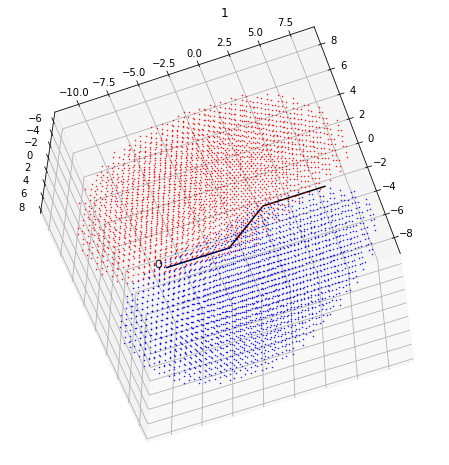

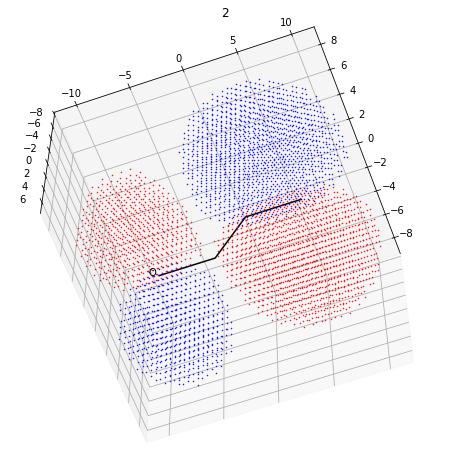

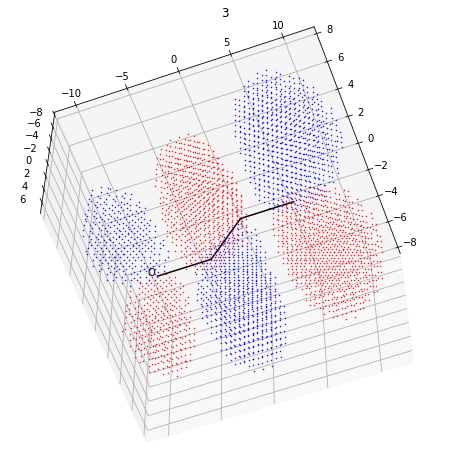

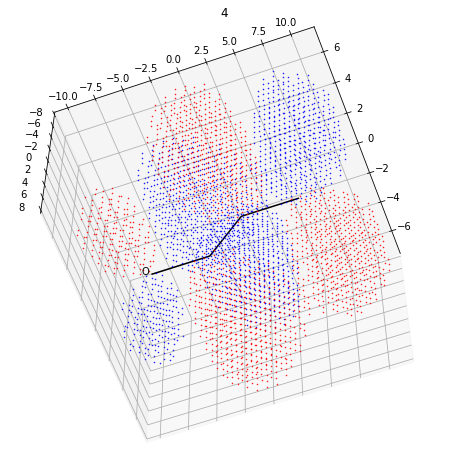

In [2]:
# Prop-2-enal - 90% Plot

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy.special import sph_harm
import math
%matplotlib inline

n = 1
l = 0
m = 0
Z = 1

# Constants
na = 6.02*np.power(10, 23)
h = 6.63/np.power(10, 34)
c = 3*np.power(10, 8)
    
# Value of beta in jmol-1
beta_si = 230000
# Value of beta per molecule
beta = beta_si/na


# Radial distribution function
def  radial_distribution(r, n, l, Z_eff):
    rho = 2.0 * Z_eff * r / n    
    p = Z*r
    if n == 1  and l == 0 :
        return 2*(Z**1.5)*np.exp(-p)
    elif n == 2  and l == 0 :
         return ((Z/2)**1.5)*(2-p)*np.exp(-p/2)
    elif n == 2  and l == 1:
         return (1/(np.sqrt(3))*((Z/2)**1.5)*p*np.exp(-p/2))
    elif n == 3  and l == 0 :
         return (2/27)*((Z/3)**1.5)*(27-18*p+2*(p**2))*np.exp(-p/3)
    elif n == 3 and l == 1 :
         return (1/27)*((2*Z/3)**1.5)*p*(6-p)*np.exp(-p/3)
    elif n == 3  and l == 2 :
         return (4/(27*np.sqrt(10)))*((Z/3)**1.5)*(p**2)*np.exp(-p/3)

def  spherical_harmonics (theta, phi, l, m):
    if l == 0 :
        if m == 0 :
             # l = 0, m = 0 
            return np.sqrt ( 1.0 / ( 4 * np.pi))
    elif l == 1 :
         if m == 0 :
             # l = 1, m = 0 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.cos ( theta)
         if m == 1 :
             # l = 1, m = + 1 
            return np.sqrt (3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
             # l = 1, m = + 1 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.sin (phi)
    else:
         if m == 0 :
            return np.sqrt ( 5.0 / ( 16.0 * np.pi)) * ( 3.0 * (np.cos (theta) ** 2 ) -1.0 )
         if m == 1 :
            return np.sqrt ( 15.0 )/ ( 4.0 * np.pi) * np.cos (theta) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
            return np.sqrt ( 15.0 / ( 4.0 * np.pi )) * np.cos (theta) * np.sin (theta) * np.sin (phi)
         if m == 2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin ( theta) ** 2 ) * np.cos ( 2 * phi)
         if m == --2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin (theta) ** 2) * np.sin ( 2 * phi)

def f(x, y, z, n, l, m, Z_eff): 
        #Convert cartesian coordinate system to polar 
        r = np.sqrt (x * x + y * y + z * z)
        Z = 6-( 0.35 * 3 + 0.85 * 2 )
        theta = 0.0 
        phi = 0.0 
        if r> 0 :
            theta = np.arccos (z / r)
        if y == 0 :
             if x < 0 :
                phi = np.pi
        elif x * x + y * y> 0 :
            phi = np.sign (y) * np.arccos (x / np.sqrt (x * x + y * y))

        # Return the wavefunction of the orbital
        return (radial_distribution(r, n, l, Z_eff) * spherical_harmonics(theta, phi, l, m))

def propenal(x, y, z, n, l, m, Z_eff):
    # Quantum numbers - Hydrogen 1s
    n = 2
    l = 1
    m = 1
    # Effective nuclear charges for each atom (calculated using Slater's Laws for Effective Nuclear Charge)
    Zc = 6-( 0.35 * 3 + 0.85 * 2 )
    Zo = 4.55
    total = 0
    # Distance between atoms
    d_1 = (147.0 / 52.9)*2
    d_2 = (134.0 / 52.9)*2
    c = [[0.2296, 0.4294, 0.57733, 0.6590],
         [-0.578, -0.537, 0.079, 0.610],
        [-0.647, 0.251, 0.550, -0.4264],
        [ -0.421 , 0.650 , -0.582 , 0.248 ]
    ]
    centre = [[(-d_1/4)-(d_2), d_1*np.sqrt(3)/4], [-d_1/4, d_1*np.sqrt(3)/4], [d_1/4, d_1*-np.sqrt(3)/4], [d_2+(d_1/4), d_1*-np.sqrt(3)/4]]
    for i in range (4):
        if i <=2:
            total = total + c[orbital][i]*f(x, y+centre[i][0], z+centre[i][1], n, l, m, Zc)
        else:
            total = total + c[orbital][i]*f(x, y+centre[i][0], z+centre[i][1], n, l, m, Zo)
    return total


for orbital in range (4):
    
    # Lists for positive data
    x_pos_list = []
    y_pos_list = []
    z_pos_list = []

    # Lists for negative data
    x_neg_list = []
    y_neg_list = []
    z_neg_list = []

    data = []

    N = 35
    spread = 15
    space = 2*spread/N
    prob = 0.0

    for i in range (N):
        for j in range (N):
            for k in range (N):
                
                x = i*space-spread
                y = j*space-spread
                z = k*space-spread
                f_1 = propenal(x, y, z, n, l, m, Z)
                # Probability distribution function
                f_2 = f_1**2
                data.append([f_2,x,y,z,f_1])
                prob = prob+f_2*space**3
    data = sorted(data, key =lambda data: data[0], reverse=True)
    total = 0.0
    i = 0
    while total<0.9*prob:
        x = data[i][1]
        y = data[i][2]
        z = data[i][3]
        total = total+(data[i][0])*space**3
        if data[i][4] >0:
            x_pos_list.append (x)
            y_pos_list.append (y)
            z_pos_list.append (z)
        else:
            x_neg_list.append (x)
            y_neg_list.append (y)
            z_neg_list.append (z) 
        i = i+1


    # Positive values
    Xpos = np.array (x_pos_list)
    Ypos = np.array (y_pos_list)
    Zpos = np.array (z_pos_list)

    # Negative values
    Xneg = np.array (x_neg_list)
    Yneg = np.array (y_neg_list)
    Zneg = np.array (z_neg_list)
    
    fig = plt.figure (figsize = ( 8.0 , 8.0 ))
    ax = fig.add_subplot ( 1 , 1 , 1 , projection = '3d' )
    
    x_range = spread
    ax.set_xlim3d (-x_range, x_range)
    ax.set_ylim3d (-x_range, x_range)
    ax.set_zlim3d (-x_range, x_range)

    # Plotting the sigma framework
    d_1 = (147.0 / 52.9)*2
    d_2 = (134.0 / 52.9)*2
    centre = [[(-d_1/4)-(d_2), d_1*np.sqrt(3)/4], [-d_1/4, d_1*np.sqrt(3)/4], [d_1/4, d_1*-np.sqrt(3)/4], [d_2+(d_1/4), d_1*-np.sqrt(3)/4]]
    x = []
    y = []
    z = []
    for i in range(4):
        x.append(0)
        y.append(-centre[i][0])
        z.append(-centre[i][1])
    x.append(0)
    y.append(centre[0][0])
    z.append(centre[0][1])
    ax.text(0, centre[0][0]-1, centre[0][1]-0.5, 'O')
    ax.plot3D(x, y, z, 'black')
    
    # Finding the max and min values for each axis in order to scale the axes
    ymin = min(min(Ypos), min(Yneg))
    ymax = max(max(Ypos), max(Yneg))
    zmin = min(min(Zpos), min(Zneg))
    zmax = max(max(Zpos), max(Zneg))
    
    ax.set_xlim3d (max(max(Xpos), max(Xneg)), min(min(Xpos), min(Xneg)))
    ax.set_ylim3d (ymin, ymax)
    ax.set_zlim3d (zmin, zmax)
    ax.title.set_text("{}".format(orbital+1, 'π'))
    
    # Plot negative values in blue
    ax.plot(Xneg, Yneg, Zneg, color = 'b' , marker = "o", markersize=0.5, linestyle = 'None' )

    # Plot positive values in red
    ax.plot(Xpos, Ypos, Zpos, color = 'r' , marker = "o", markersize=0.5, linestyle = 'None' )

    ax.view_init(120, -20)
    
plt.show()

The π system of prop-2-enal contains four electrons: one is contributed by each carbon and oxygen atom. As a result, the lowest energy two molecular orbitals are filled. In a nucleophilic addition reaction, a pair of electrons is contributed into the LUMO[<sup>4</sup>](#fn4) of the electrophile[<sup>5</sup>](#fn5). The equation describing the LUMO of prop-2-enal, the 3π orbital, is shown again below: 

$$
E_3= α-0.39β,ψ_3=-0.65χ_1+0.25χ_2+0.55χ_3-0.46χ_4
$$

The largest region, which has greatest probability of finding an electron (as a result of having the greatest coefficient), and therefore most likely site of nucleophilic attack, is in fact carbon 1. Electron density is also donated to the region in between carbons 2 and 3, accounting for the double bond shown in the structure after addition.

<span id="fn1"> 1: Yates, K. (1978). Hückel molecular orbital theory. New York: Academic Press.</span>

<span id="fn2"> 2: Yates, (1978)</span>

<span id="fn3"> 3: $χ_n$ denotes the 2p orbital of atom $n$ </span>

<span id="fn4"> 4: Lowest unoccupied molecular orbital</span>

<span id="fn5"> 5: In this case, the electrophile is prop-2-enal</span>